<a href="https://colab.research.google.com/github/jongheonleee/LangMaster-AI/blob/main/AI%EC%88%98%EC%97%853%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치 (처음 한 번만 실행)
!apt-get update -qq
!apt-get install -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.


In [2]:
data_x = [10, 20, 30, 40]
data_y = [21, 49, 68, 80]

mean_x = sum(data_x) / len(data_x)
mean_y = sum(data_y) / len(data_y)
# 기울기
# 기울기의 분모 - (x - x평균)의 제곱의 합
denominator = sum((xi - mean_x) ** 2 for xi in data_x)
# 기울기의 분자 - (x- x평균)*(y - y평균)의 합
numerator = sum((data_x[i] - mean_x) * (data_y[i] - mean_y)
                          for i in range(len(data_x)))

slope = numerator/ denominator
intercept = mean_y - (slope * mean_x)

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 1.96
Intercept: 5.5


In [3]:
import numpy as np

data_x = np.array([10, 20, 30, 40])
data_y = np.array([21, 49, 68, 80])

mean_x = np.mean(data_x)
mean_y = np.mean(data_y)

# 기울기 계산
numerator = np.sum((data_x - mean_x) * (data_y - mean_y))
denominator = np.sum((data_x - mean_x) ** 2)
slope = numerator / denominator

# 절편 계산
intercept = mean_y - (slope * mean_x)

print("Slope:", slope)
print("Intercept:", intercept)

# 광고비 35인 경우 예측되는 판매량 계산
Y_pre = (slope * 35) + intercept
print("predict", Y_pre)


Slope: 1.96
Intercept: 5.5
predict 74.1


In [4]:
# 성장 예측 함수 정의
def predict_size(x):
  # 최대 크기 30 설정
  MAX_SIZE = 30
  value = slope * x + intercept

  if value > MAX_SIZE:
    return MAX_SIZE

  return round(value, 3)

data_x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
data_y = np.array([0.2, 0.3, 0.5, 0.6, 0.9, 0.95, 1.1, 1.5])

mean_x = np.mean(data_x)
mean_y = np.mean(data_y)

# 기울기 계산
# - 분모, 분자
numerator = np.sum((data_x - mean_x) * (data_y - mean_y))
denominator = np.sum((data_x - mean_x) ** 2)
slope = round(numerator / denominator, 4)

# 절편
intercept = round(mean_y - (slope * mean_x), 4)

print("Slope:", slope)
print("Intercept:", intercept)


Y_pre = (slope * 5) + intercept
print("predict", Y_pre)
print("오차", round(data_y[4] - Y_pre, 4))

Slope: 0.1756
Intercept: -0.0339
predict 0.8441
오차 0.0559


In [5]:
# 평균 제곱근 오차(RMSE)

import numpy as np

def rmse(y_true, y_pred):
  mse = np.mean((np.array(y_true) - np.array(y_pred)) ** 2)
  return np.sqrt(mse)

x_true = [21, 49, 68, 80]
y_pred = [25.1, 44.7, 64.3, 83.9]

print("RMSE: ", rmse(x_true, y_pred))

RMSE:  4.006245124802027


In [6]:
class MyMachine:
  def __init__(self, x_true, y_pred):
    self.np_x = np.array(x_true)
    self.ny_y = np.array(y_pred)
    self.pred_sizes = 0.1756 * self.np_x - 0.03392 # 이전에 사용한 선형 회귀임

  def rmse(self):
    mse = np.mean((self.np_x - self.ny_y) ** 2)
    return np.sqrt(mse)

  def errors(self):
    return self.np_x - self.pred_sizes

  def squared_errors(self):
    return self.errors() ** 2




In [7]:
mm = MyMachine(x_true=[21, 49, 68, 80], y_pred=[25.1, 44.7, 64.3, 83.9])
res = mm.rmse()
print(res)

4.006245124802027


In [8]:
weeks = [i for i in range(1, 8+1)]
actual_sizes = [0.2, 0.3, 0.5, 0.6, 0.9, 0.95, 1.1, 1.5]
mm = MyMachine(x_true = weeks, y_pred = actual_sizes)
rmse = mm.rmse()
print(rmse)

print("실제 크기:", actual_sizes)
print("오차", mm.errors())
print("제곱 오차", mm.squared_errors())
print(f"\nRMSE {mm.rmse():.10f}")


4.193931627959617
실제 크기: [0.2, 0.3, 0.5, 0.6, 0.9, 0.95, 1.1, 1.5]
오차 [0.85832 1.68272 2.50712 3.33152 4.15592 4.98032 5.80472 6.62912]
제곱 오차 [ 0.73671322  2.8315466   6.28565069 11.09902551 17.27167105 24.8035873
 33.69477428 43.94523197]

RMSE 4.1939316280


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

Iter 1: x = -2.4000, gradient = 6.0000, f(x) = 5.7600
Iter 2: x = 1.9200, gradient = -4.8000, f(x) = 3.6864
Iter 3: x = -1.5360, gradient = 3.8400, f(x) = 2.3593
Iter 4: x = 1.2288, gradient = -3.0720, f(x) = 1.5099
Iter 5: x = -0.9830, gradient = 2.4576, f(x) = 0.9664
Iter 6: x = 0.7864, gradient = -1.9661, f(x) = 0.6185
Iter 7: x = -0.6291, gradient = 1.5729, f(x) = 0.3958
Iter 8: x = 0.5033, gradient = -1.2583, f(x) = 0.2533
Iter 9: x = -0.4027, gradient = 1.0066, f(x) = 0.1621
Iter 10: x = 0.3221, gradient = -0.8053, f(x) = 0.1038
Iter 11: x = -0.2577, gradient = 0.6442, f(x) = 0.0664
Iter 12: x = 0.2062, gradient = -0.5154, f(x) = 0.0425
Iter 13: x = -0.1649, gradient = 0.4123, f(x) = 0.0272
Iter 14: x = 0.1319, gradient = -0.3299, f(x) = 0.0174
Iter 15: x = -0.1056, gradient = 0.2639, f(x) = 0.0111
Iter 16: x = 0.0844, gradient = -0.2111, f(x) = 0.0071
Iter 17: x = -0.0676, gradient = 0.1689, f(x) = 0.0046
Iter 18: x = 0.0540, gradient = -0.1351, f(x) = 0.0029
Iter 19: x = -0.043

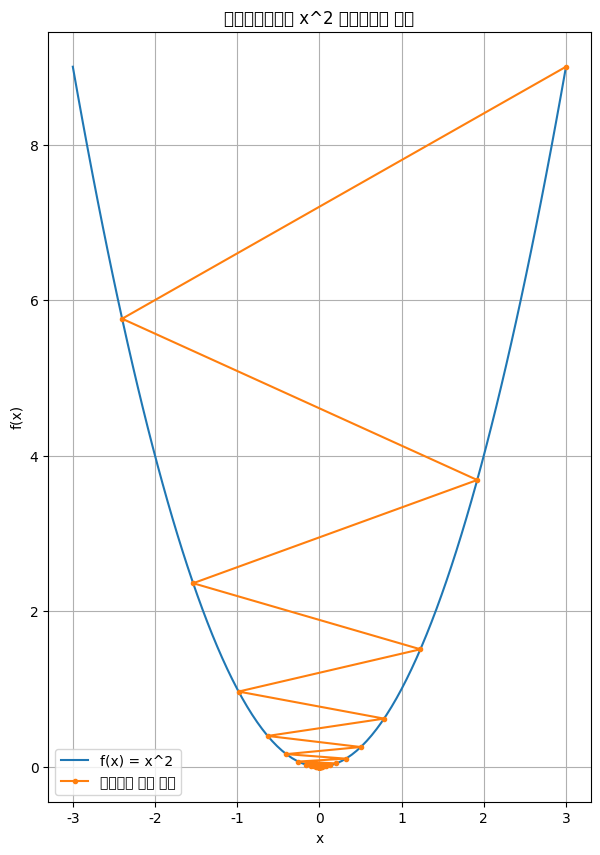

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import platform # 한글 폰트 설정


if platform.system() == 'Windows':# 윈도우인 경우
    font_path = "c:/Windows/Fonts/malgun.ttf" # 맑은 고딕 폰트 경로
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
elif platform.system() == 'Darwin': # macOS인 경우
    plt.rc('font', family='AppleGothic')
else: # Linux 등 다른 OS인 경우
    plt.rc('font', family='NanumGothic')
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


def f(x):
  return x**2

def df(x):
  return 2*x

x = 3.0
### 이 부분이 오늘 깨달은 부분 ㅋㅋㅋ -> Learning Late를 왜 사용하는지에 대해 알게됨
alpha = 0.9 # 이 부분 바꿔보면서 코드 실행하면 Learning Late 부분의 의미를 알 수 있음
num_iterations = 50

x_hist = [x]
f_hist = [f(x)]


for i in range(num_iterations):
  gradient = df(x)
  x = x - alpha * gradient
  x_hist.append(x)
  f_hist.append(f(x))

  print(f"Iter {i+1}: x = {x:.4f}, gradient = {gradient:.4f}, f(x) = {f(x):.4f}")

x_vals = np.linspace(-3, 3, 100)
y_vals = f(x_vals)

plt.figure(figsize=(7, 10))
plt.plot(x_vals, y_vals, label="f(x) = x^2")
plt.plot(x_hist, f_hist, '.-', label="경사하강 이동 경로")

plt.title("경사하강법으로 x^2 최소화하는 과정")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()